In [10]:
import main
import beacon

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [11]:
#    num(total validators) = 30
#    p(honest validators proportion): 2/3
#    t(time when the honest validators seeking to vote) = 0.5
#    t(time when the dishonest validators who are "aiming" a smoke cloud) = 0.5
#    epsilon(bound of error) = 0.1
#    a(time latency) = 0.3
boo = beacon.Faction.HonestFaction(20, "Honest", 0.5, 0.1, 0.3)
poo = beacon.Faction.SmokeFaction(10, "Dishonest", 0.5, 0.1, 0.3)

In [12]:
def plot_game_ratio():
    """
    This function calculates the ratio of 0s and 1s in one game and draws the scatter plot
    """
    
    game = beacon.play(boo, poo)
    
    numberZeros = 0
    ratioZeros = 0
    ratioZeros_list = []
    for n in range(len(game)):
        if game[n][2] == 0:
            numberZeros += 1
        ratioZeros = numberZeros/(n+1)
        ratioZeros_list.append(ratioZeros)
    ratioOnes_list = [1-item for item in ratioZeros_list]
    
    plt.plot(range(30), np.ravel(ratioZeros_list), 'o', color = 'red')
    plt.plot(range(30), np.ravel(ratioOnes_list), 'o', color = 'blue')
    plt.ylabel('ratio')
    plt.xlabel('Number of votes')
    plt.title('The ratio for number of 0s and the ratio for number of 1s in one game')
    plt.legend(('0', '1'))
    
    plt.show()    

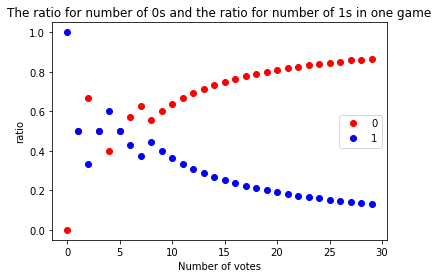

In [13]:
plot_game_ratio()

In [14]:
#As you can see, the ratio for number of 0s and the ratio for number of 1s generally will increase or decrease
#monotonically after some number of votes. It makes sense since the honest validators will always attest the target 
#with the most number of votes

In [16]:
def plot_win_lose(n_simulations):
    """
    parameters: the number of games simulated
    
    This function calculates the number of wins and loses in n simulated games and draws the bar plot
    """
    stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]
    
    wins = 0
    for s in stats:
        if s[0] / (s[1]+s[0]) >= 2/3 or s[1] / (s[0]+s[1]) >= 2/3:
            wins += 1
        
    result = ('Win', 'Lose')
    y_pos = np.arange(len(result))
    performance = [wins, len(stats)-wins]
    
    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.text(-0.05, len(stats)/2, wins)
    plt.text(0.95, len(stats)/2, len(stats)-wins)
    plt.xticks(y_pos, result)
    plt.ylabel('Result')
    plt.title('Number of Win & Lose for n simulated games')
    plt.show()
    
    
    return performance

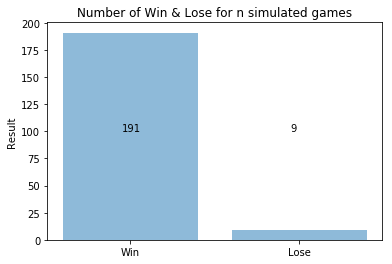

[191, 9]

In [17]:
plot_win_lose(200)

In [18]:
#next we are going to explore the ratio of winning and losing, to see if there is any pattern
def win_lose_ratio(n_simulations, n_ratio_compared):
    """
    parameters:
        n_simulations: The number of games simulated to obtain one ratio value
        n_ratio_compared: The number of ratio values
        
    This function calculates the ratio of wins and loses in n_simulations games, 
    then append each ratio (total of n_ratio_compared ratios) to the list
    """
    ratio_list = []
    
    for n in range(n_ratio_compared):
        ratio = 0
        stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]

        wins = 0
        for s in stats:
            if s[0] / (s[1]+s[0]) >= 2/3 or s[1] / (s[0]+s[1]) >= 2/3:
                wins += 1

        ratio = wins/len(stats)
        ratio_list.append(ratio)
    
    return ratio_list

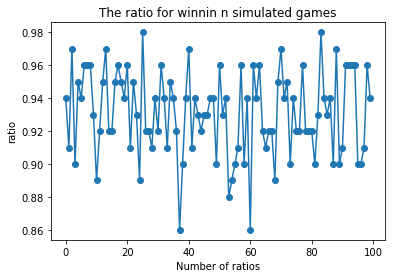

In [19]:
#the plot of 100 ratios of 100 simulated games
win_lose_ratio = win_lose_ratio(100, 100)
plt.plot(win_lose_ratio, 'o-')
plt.ylabel('ratio')
plt.xlabel('Number of ratios')
plt.title('The ratio for winnin n simulated games')
plt.show()

In [20]:
#Through the example above, we have obtained 100 win/lose ratios of 100 simulated games 
#(so each ratio is calculated by the data from 100 simulated games)
#There is no significant pattern except most of the ratios are centered around 0.93
#we can calculate the basic stats
ratio_df = pd.DataFrame(win_lose_ratio)
ratio_df.columns = ['win']
ratio_df.describe()

,win
count,100.000000
mean,0.931000
std,0.025839
min,0.860000
25%,0.910000
50%,0.930000
75%,0.950000
max,0.980000


In [21]:
#we can calculate the 95% confidence interval by using the scipy.stats.interval function
st.t.interval(0.95, len(win_lose_ratio)-1, loc=np.mean(win_lose_ratio), scale=st.sem(win_lose_ratio))

(0.92587289409815698, 0.93612710590184289)

In [22]:
#or we can do it manually
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [23]:
mean_confidence_interval(win_lose_ratio)

(0.93099999999999994, 0.92587289409815698, 0.93612710590184289)

In [24]:
#future works:
#We have only done the analysis for one set of parameters, namely:
#    
#    num(total validators) = 30
#    p(honest validators proportion): 2/3
#    t(time when the honest validators seeking to vote) = 0.5
#    t(time when the dishonest validators who are "aiming" a smoke cloud) = 0.5
#    epsilon(bound of error) = 0.1
#    a(time latency) = 0.3
#
#Next we can to apply the above analysis 